In [147]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
import joblib

In [66]:
os.listdir('data')

['medical.csv', 'weatherAUS.csv']

In [67]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [69]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [70]:
df.dropna(subset=['RainTomorrow'], inplace= True)

<Axes: xlabel='Date', ylabel='count'>

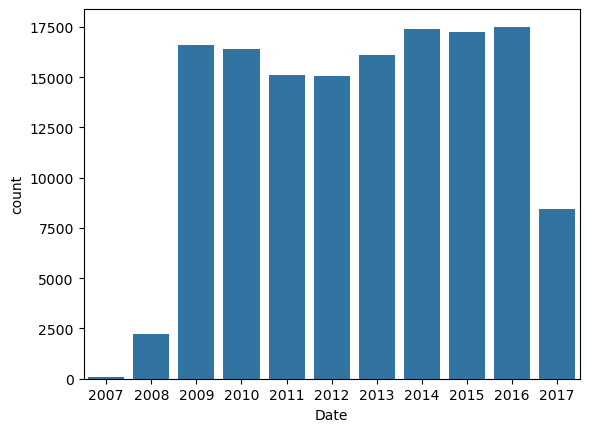

In [71]:
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

In [72]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [73]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [74]:
train_inputs= train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [75]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [76]:
imputer = SimpleImputer(strategy='mean').fit(df[numeric_cols])

In [77]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [78]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [79]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [80]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [81]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore').fit(train_inputs[categorical_cols])

In [82]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [83]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_18124\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_18124\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_18124\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

In [84]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [85]:
model = DecisionTreeClassifier(random_state= 67)

In [86]:
model.fit(X_train,train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,67
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [87]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(98988,), dtype=object)

In [88]:
accuracy_score(train_preds,train_targets)

0.9999797955307714

In [89]:
model.score(X_val,val_targets)

0.7944982879693575

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

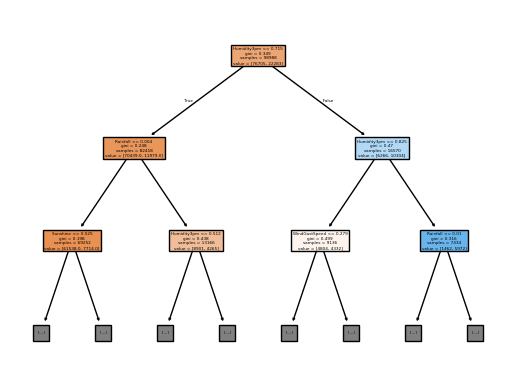

In [90]:
##Here we are overfitting as our model is good on training set but not on validation or test set
plot_tree(model,feature_names= X_train.columns,max_depth= 2, filled= True)

In [91]:
importance_df = pd.DataFrame({
  'feature' : X_train.columns,
  'importance' : model.feature_importances_
}).sort_values('importance', ascending= False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261908
11,Pressure3pm,0.061520
2,Rainfall,0.059690
5,WindGustSpeed,0.055567
4,Sunshine,0.050167
8,Humidity9am,0.039592
10,Pressure9am,0.035383
0,MinTemp,0.033893
14,Temp9am,0.033721
1,MaxTemp,0.031557


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

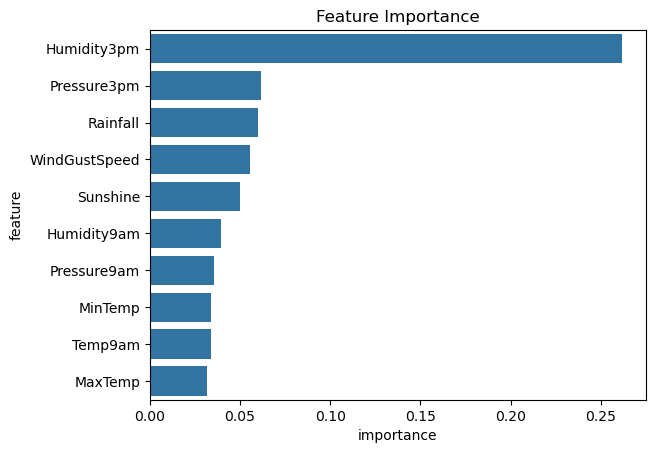

In [92]:
plt.title("Feature Importance")
sns.barplot(data = importance_df.head(10), x= 'importance', y = 'feature')

In [93]:
model = DecisionTreeClassifier(max_depth= 3, random_state= 67)

In [94]:
model.fit(X_train,train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,67
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [95]:
model.score(X_train,train_targets)

0.8291308037337859

In [96]:
model.score(X_val,val_targets)

0.8334397307178921

In [97]:
#Try to find the best max depth for the decision tree
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state= 67)
  model.fit(X_train,train_targets)
  train_error = 1-model.score(X_train,train_targets)
  val_error = 1 -model.score(X_val,val_targets)
  return {'Max Depth' : md, 'Training Error' : train_error, 'Validation Error' : val_error}

In [98]:
%%time
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])
error_df

CPU times: total: 36 s
Wall time: 36.3 s


,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157913
8,9,0.140916,0.156404
9,10,0.132956,0.157739


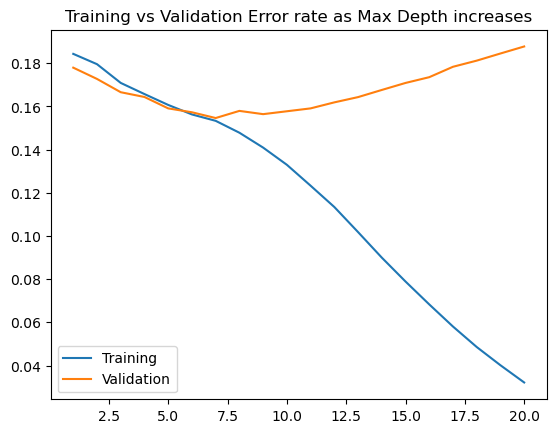

In [99]:
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.legend(['Training', 'Validation'])
plt.title("Training vs Validation Error rate as Max Depth increases")
plt.show()

In [100]:
model = DecisionTreeClassifier(max_depth=7, random_state= 67).fit(X_train,train_targets)
model.score(X_train,train_targets), model.score(X_val,val_targets)

(0.8466884874934335, 0.8453949277465034)

In [101]:
#Another way to reduce overfitting more is by max_leaf_nodes hyperparameter of the DecisionTreeClassifier

model = DecisionTreeClassifier(max_leaf_nodes=128,random_state= 67)
model.fit(X_train,train_targets)
model.score(X_train,train_targets), model.score(X_val,val_targets)

(0.8480421869317493, 0.8442342290058615)

In [102]:
model.tree_.max_depth

12

In [103]:
model = DecisionTreeClassifier(random_state= 67)
path = model.cost_complexity_pruning_path(X_train,train_targets)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

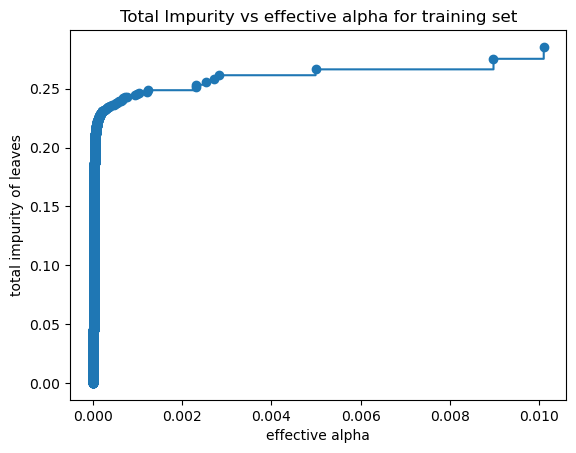

In [104]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [105]:
"""
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state= 67, ccp_alpha= ccp_alpha)
  clf.fit(X_train,train_targets)
  clfs.append(clf)
print('Number of nodes in the last tree is {} with ccp_alpha: {}'.format(clfs[-1].tree_.node_count,ccp_alphas[-1]))
"""

"\nclfs = []\nfor ccp_alpha in ccp_alphas:\n  clf = DecisionTreeClassifier(random_state= 67, ccp_alpha= ccp_alpha)\n  clf.fit(X_train,train_targets)\n  clfs.append(clf)\nprint('Number of nodes in the last tree is {} with ccp_alpha: {}'.format(clfs[-1].tree_.node_count,ccp_alphas[-1]))\n"

In [106]:
"""
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
"""

'\nclfs = clfs[:-1]\nccp_alphas = ccp_alphas[:-1]\n\nnode_counts = [clf.tree_.node_count for clf in clfs]\ndepth = [clf.tree_.max_depth for clf in clfs]\nfig, ax = plt.subplots(2, 1)\nax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")\nax[0].set_xlabel("alpha")\nax[0].set_ylabel("number of nodes")\nax[0].set_title("Number of nodes vs alpha")\nax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")\nax[1].set_xlabel("alpha")\nax[1].set_ylabel("depth of tree")\nax[1].set_title("Depth vs alpha")\nfig.tight_layout()\n'

In [107]:
"""
train_scores = [clf.score(X_train, train_targets) for clf in clfs]
test_scores = [clf.score(X_test, test_targets) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
"""

'\ntrain_scores = [clf.score(X_train, train_targets) for clf in clfs]\ntest_scores = [clf.score(X_test, test_targets) for clf in clfs]\n\nfig, ax = plt.subplots()\nax.set_xlabel("alpha")\nax.set_ylabel("accuracy")\nax.set_title("Accuracy vs alpha for training and testing sets")\nax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")\nax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")\nax.legend()\nplt.show()\n'

In [109]:
#RandomForest now
model = RandomForestClassifier(n_jobs=-1, random_state= 67)

In [ ]:
%%time
model.fit(X_train,train_targets)

CPU times: total: 38.6 s
Wall time: 4.19 s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [112]:
model.score(X_train,train_targets), model.score(X_val,val_targets)

(0.9999797955307714, 0.8567117404677616)

In [113]:
#Now we'll tune our random forest model to try to increase the accuracy
base_model = RandomForestClassifier(n_jobs= -1, random_state= 67)

In [115]:
#For benchmark
base_train_acc = model.score(X_train, train_targets)
base_val_acc = model.score(X_val, val_targets)
base_accs = base_train_acc,base_val_acc
base_accs

(0.9999797955307714, 0.8567117404677616)

In [116]:
#n_estimator means how many decision tree in our random forest, default = 100, more reduces overfitting

model = RandomForestClassifier(n_jobs= -1, random_state= 67, n_estimators=10)
model.fit(X_train,train_targets)
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9873924112013578, 0.8448726133132145)

In [145]:
model = RandomForestClassifier(n_jobs= -1, random_state= 67, n_estimators=500)
model.fit(X_train,train_targets)
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.8560153212233764)

In [118]:
def test_params(**params):
  model = RandomForestClassifier(n_jobs= -1, random_state= 67, **params).fit(X_train,train_targets)
  return model.score(X_train,train_targets),model.score(X_val,val_targets)

In [120]:
#test_params(max_depth = 5, max_leaf_nodes = 1024, n_estimators = 1000)

In [121]:
test_params(max_depth = 26)

(0.9807653452943791, 0.8555510417271197)

In [125]:
test_params(max_leaf_nodes = 2**5)

(0.8315351355719885, 0.8345423945215019)

In [126]:
test_params(max_leaf_nodes = 2**20)

(0.9999797955307714, 0.8562474609715048)

In [ ]:
base_accs

(0.9999797955307714, 0.8567117404677616)

In [128]:
test_params(max_features = 'log2')

(0.9999797955307714, 0.8550287272938308)

In [129]:
test_params(max_features = 3)

(0.9999797955307714, 0.8509662817015844)

In [132]:
test_params(max_features = 20)

(0.9999696932961571, 0.8561313910974406)

In [131]:
base_accs

(0.9999797955307714, 0.8567117404677616)

In [ ]:
test_params(min_samples_split = 4, min_samples_leaf = 2)

(0.9623994827655877, 0.8577563693343393)

In [134]:
test_params(min_samples_split =100, min_samples_leaf = 60)

(0.8506586656968521, 0.8455109976205676)

In [139]:
test_params(min_impurity_decrease = 1e-6)

(0.9890794843819453, 0.8564215657826011)

In [138]:
test_params(min_impurity_decrease = 1e-2)

(0.774891906089627, 0.7882885497069235)

In [140]:
test_params(bootstrap = False)

(0.9999797955307714, 0.8583367187046602)

In [141]:
test_params(max_samples = 0.9)

(0.999898977653857, 0.8556090766641519)

In [142]:
test_params(class_weight = 'balanced')

(0.9999797955307714, 0.8561894260344728)

In [143]:
test_params(class_weight = {'No':1,'Yes':2})

(0.9999797955307714, 0.8565956705936975)

In [146]:
model.score(X_test,test_targets)

0.8465388465388466

In [148]:
rain = {
  'model' : model,
  'imputer' : imputer,
  'scaler' : scaler,
  'encoder' : encoder,
  'input_cols' : input_cols,
  'target_cols' : target_cols,
  'numeric_cols' : numeric_cols,
  'categorical_cols' : categorical_cols,
  'encoded_cols' : encoded_cols
}

In [1]:
#joblib.dump(rain,'models/DecisionAndRandomForest.joblib') too large